<a href="https://colab.research.google.com/github/DangPhan23/AI_W9_31_3_2023/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from keras.datasets import cifar100 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.utils import img_to_array
from keras.models import load_model
from keras.utils import load_img
from tensorflow import keras
from pylab import *
from PIL import Image
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

In [59]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [60]:
x_train.shape

(50000, 32, 32, 3)

In [61]:
x_train.shape

(50000, 32, 32, 3)

In [62]:
x_test.shape

(10000, 32, 32, 3)

In [63]:
y_test.shape

(10000, 1)

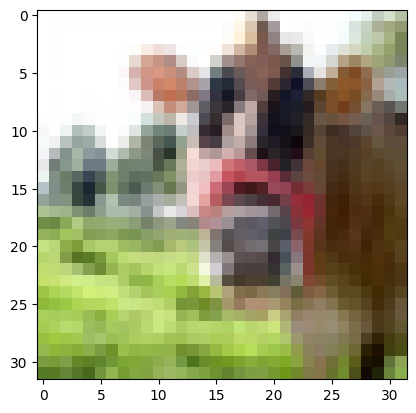

so nay la: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


In [64]:
digit = x_train[0]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so nay la:', x_train[0] )

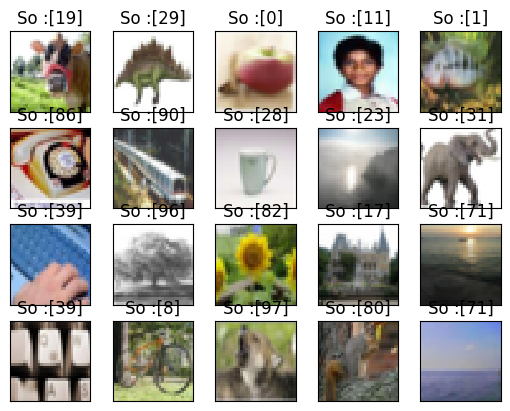

In [65]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [66]:
model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 100)               51300     
                                                                 
Total params: 4,772,452
Trainable params: 4,772,452
Non-trainable params: 0
_________________________________________________________________


In [67]:
x_train=x_train.reshape((50000, 32*32*3))
x_train=x_train.astype('float32')/255    

x_test=x_test.reshape((10000, 32*32*3))
x_test=x_test.astype('float32')/255

y_train=to_categorical(y_train, 100)
y_test=to_categorical(y_test, 100)

In [68]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs= 20, batch_size= 512)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Độ chính xác:', test_acc)
print('Độ mất mát:', test_loss)

Epoch 1/20
98/98 [==============================] - 2s 10ms/step - loss: 4.4997 - accuracy: 0.0343
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 4.0813 - accuracy: 0.0733
Epoch 3/20
98/98 [==============================] - 1s 8ms/step - loss: 3.9016 - accuracy: 0.1002
Epoch 4/20
98/98 [==============================] - 1s 7ms/step - loss: 3.7746 - accuracy: 0.1222
Epoch 5/20
98/98 [==============================] - 1s 7ms/step - loss: 3.6722 - accuracy: 0.1372
Epoch 6/20
98/98 [==============================] - 1s 7ms/step - loss: 3.5870 - accuracy: 0.1521
Epoch 7/20
98/98 [==============================] - 1s 8ms/step - loss: 3.5074 - accuracy: 0.1670
Epoch 8/20
98/98 [==============================] - 1s 8ms/step - loss: 3.4342 - accuracy: 0.1804
Epoch 9/20
98/98 [==============================] - 1s 7ms/step - loss: 3.3644 - accuracy: 0.1913
Epoch 10/20
98/98 [==============================] - 1s 7ms/step - loss: 3.2867 - accuracy: 0.2057
Epoch 11/20
98/98 

In [69]:
model.save('cifar100.h5')

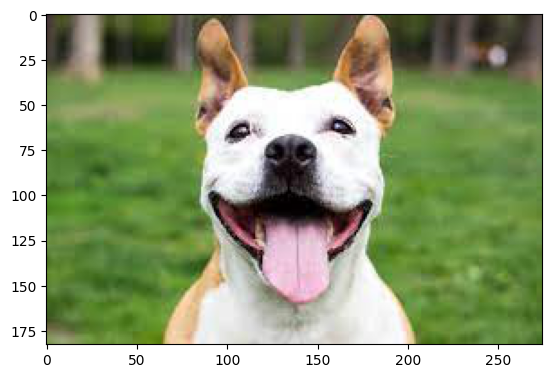

In [71]:
img = Image.open('dog.jpg')
imshow(img)

In [72]:
img = load_img('dog.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 177ms/step


array([65])